Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your github nickname below:

In [ ]:
NICKNAME = "Alexander Myza"

---

# Метод Монте-Карло: расчет погрешности
Вероятно, вы уже сталкивались с концепцией [propagation of uncertainty](https://en.wikipedia.org/wiki/Propagation_of_uncertainty). Идея заключается в том, что по заданным измерениям с погрешностями, мы можем найти неопределенность конечного результата. 
Например, рассмотрим следующее равенство:
$$F = \frac{G M_1 M_2}{r^2}$$
Оно определяет гравитационное взаимодействие между двумя телами массами $M_1$ и $M_2$, расположенными друг от друга на расстоянии r. 
Пусть
    $$M_1 = 40 × 10^4 ± 0.05 × 10^4 kg$$ 
    $$M_2 = 30 × 10^4 ± 0.1 × 10^4 kg$$
    $$r = 3.2 ± 0.01 m$$

Предполагаем, что ошибки измерения описываются Гауссовым распределением, величины стандартных отклонений которых суть наблюдаемые неопределённости $a = \left< a\right>\pm \sigma_a$.

Гравитационная постоянная -- константа.
$$G = 6.67384×10^{−11} m^3 kg^{−1} s^{−2}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Задание 1.1
Напишите функцию, определяющую среднее и стандартное отклонение распределения силы с помощью стандартного метода:
https://en.wikipedia.org/wiki/Propagation_of_uncertainty#Example_formulas

In [9]:
def error(M1, dM1, M2, dM2, r, dr):
    G = 6.67384 * 10 ** (-11)
    F = G * M1 * M2 / r ** 2
    sigma = (G / r ** 2) * (((2 * M1 * M2 * dr )/ r) ** 2 + (M1 * dM2) ** 2 + (M2 * dM1) ** 2) ** 0.5
    # raise NotImplementedError()
    return F, sigma

In [10]:
print(error(40*10**4, 0.05 * 10**4, 30 * 10**4, 0.1 * 10**4, 3.2, 0.01))

(0.7820906249999999, 0.005625407272639264)


Теперь давайте попробуем получить то же распределение с помощью метода Монте Карло. Он заключается в многократной генерации случайных входных данных и анализе полученных результатов.
В нашем алгоритм следующий:

1.Генерируем гауссово распределение случайных величин $M_1, M_2$ и $r$ ($10^6$ точек), используя средние значение и стандартные отклонения, указаные выше.
    
2.Для каждой реализации вычисляем силу.

Совет: Не используйте циклы. Чтобы получить $10^6$ случайных точек, используйте библиотеку numpy.

# Задание 1.2 

Напишите функцию, которая моделирует силу методом Монте-Карло и строит нормированную гистограмму.

In [5]:
def MonteCarloNormal(M1, dM1, M2, dM2, r, dr, n=10**6):
    G = 6.67384 * 10 ** (-11)
    r_ar = np.random.normal(r, dr, (1, n))
    M1_ar = np.random.normal(M1, dM1, (1, n))
    M2_ar = np.random.normal(M2, dM2, (1, n))
    F = (G * M1_ar * M2_ar )/ r_ar ** 2
    return F[0]
    #raise NotImplementedError()

# Задание 1.3

Постройте гистограмму распределения силы методом Монте-Карло,вызвав MonteCarloNormal, а также постройте график гауссовой плотности вероятности с параметрами, полученными из error().

Совет: Убедитесь, что вы верно выбрали пределы величины x и оба графика видны. Выберите разумное количество столбиков гистограммы и сравните форму гистограммы и графика.

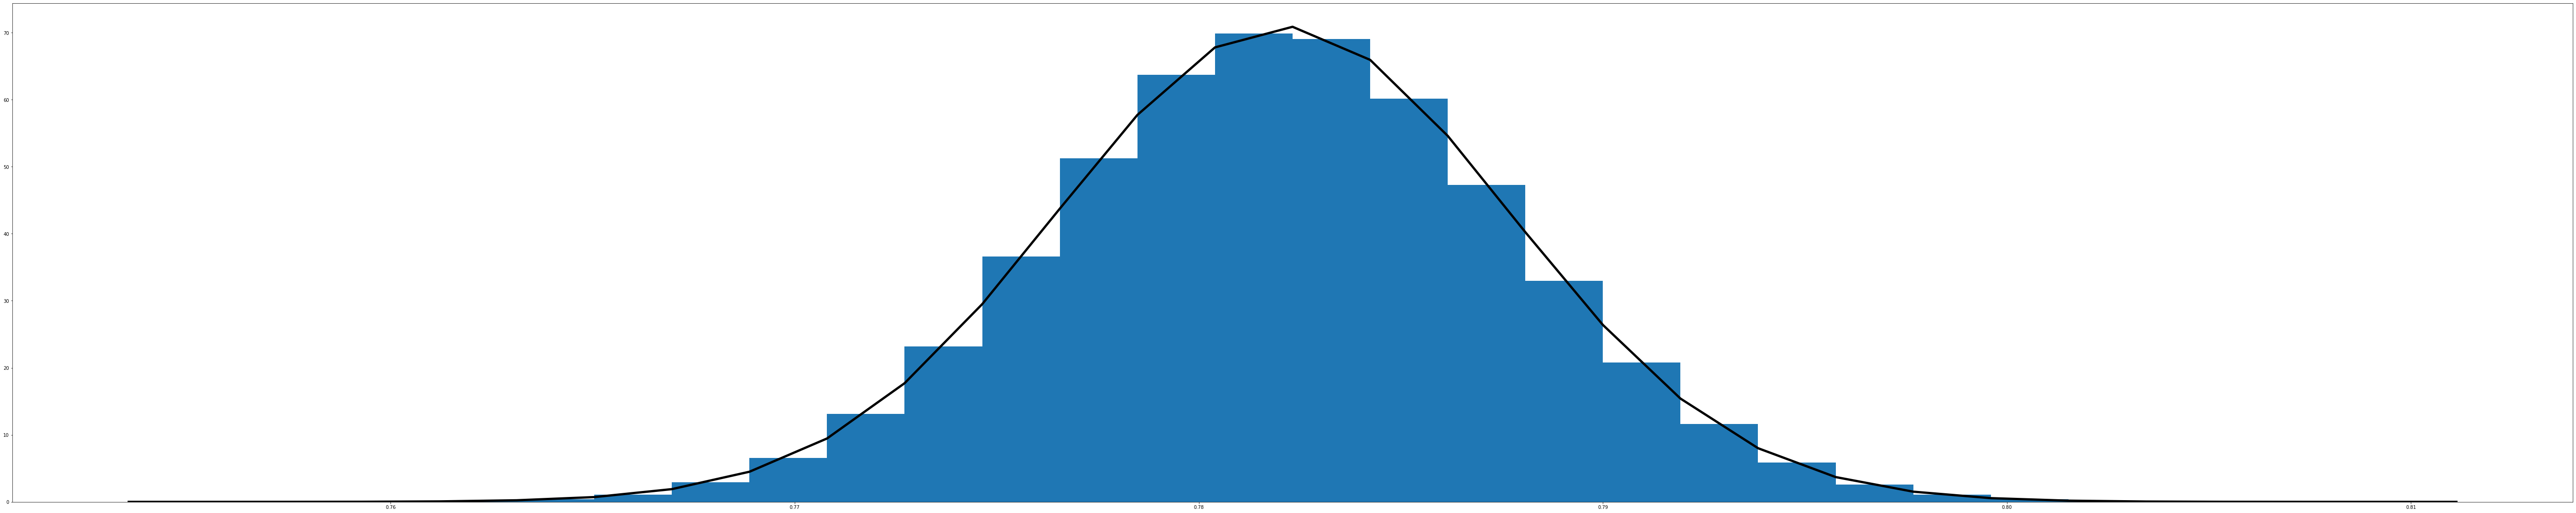

In [19]:
F = MonteCarloNormal(40*10**4, 0.05 * 10**4, 30 * 10**4, 0.1 * 10**4, 3.2, 0.01)
F_1, sigma_1 = error(40*10**4, 0.05 * 10**4, 30 * 10**4, 0.1 * 10**4, 3.2, 0.01)

plt.figure(figsize=(100, 20))
count, bins, ignored = plt.hist(F, 30, density=True)
plt.plot(bins, 1/(sigma_1 * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - F_1)**2 / (2 * sigma_1**2) ),
         linewidth=5, color='black')
plt.show()
#raise NotImplementedError() В выводе я не смог нечего написать, так как мои действия там не отображаются, прэтому напишу тут.
#Каждый из методов работает исправно и имеет право на существование

Сделайте вывод о согласованности двух подходов.

# Задание 2.1
Повторите те же действия для следующих данных:

$$M1=40×10^4±2×10^4kg$$
$$M2=30×10^4±10×10^4kg$$
$$r=3.2±1.0 m$$

и постройте графики.

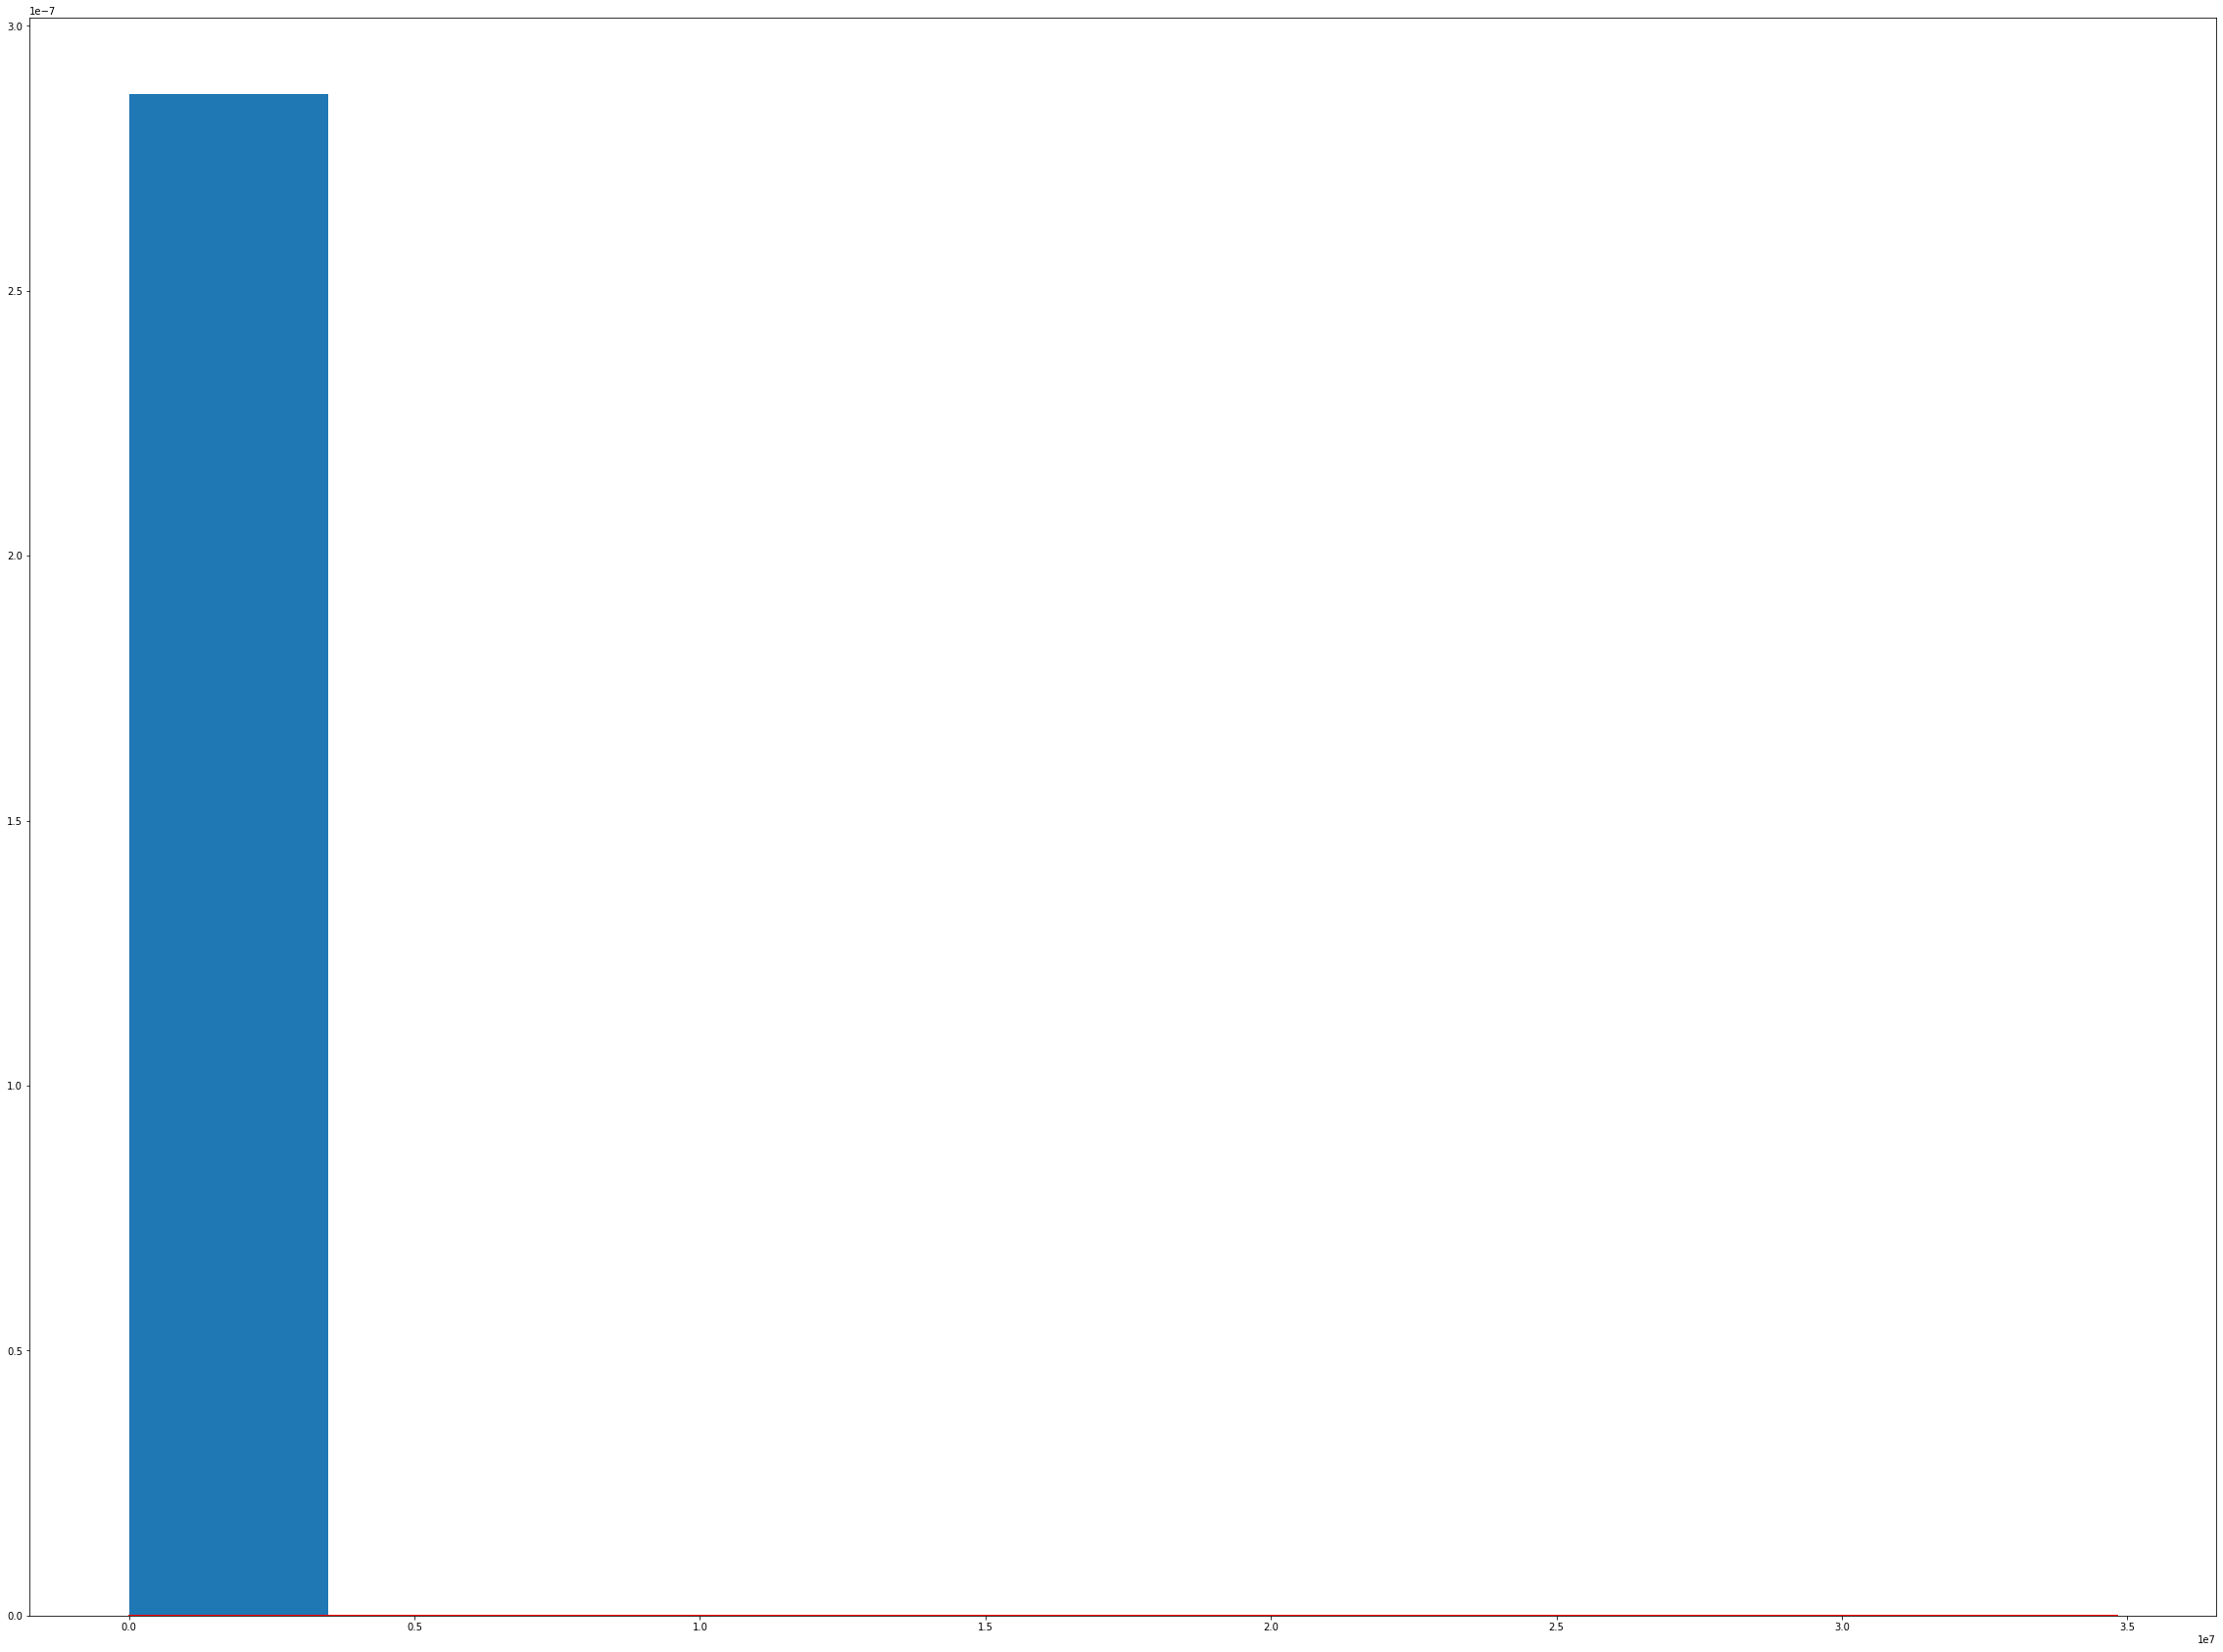

In [18]:
F_i = MonteCarloNormal(40*10**4, 2 * 10**4, 30 * 10**4, 10 * 10**4, 3.2, 1)
F_2, sigma_2 = error(40*10**4, 2 * 10**4, 30 * 10**4, 10 * 10**4, 3.2, 1)


plt.figure(figsize=(40, 30))

count, bins, ignored = plt.hist(F_i, 10, density=True)
plt.plot(bins, 1/(sigma_e_2 * np.sqrt(2 * np.pi)) *
               np.exp(- (bins - F_2)**2 / (2 * sigma_2**2) ),
         linewidth=2, color='r')

plt.show()
#raise NotImplementedError()

# Задание 2.2

Какой метод более точный в этом случае и почему? Как вы думаете, в чем состоят преимущества метода Монте-Карло?

Точнее оказался метод Монте-Карло ведь средние значения величин имеют одни порядок со стандартными отклонениями.

Преимущества Монте-Карло - "неприхотливость" ко входным данным. можно "затребовать" ответ с необходимой нам точностью.